In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

# Creating Sample Data

In [6]:
# Creating dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=4)

In [7]:
# Converting to dataframe
df = pd.DataFrame(X)

target = pd.Series(y)

In [8]:
# Getting random number
rand_num = np.random.randint(0, 100)

# Random data point
point = df.iloc[rand_num]
t_point = target.iloc[rand_num]
t_point

2

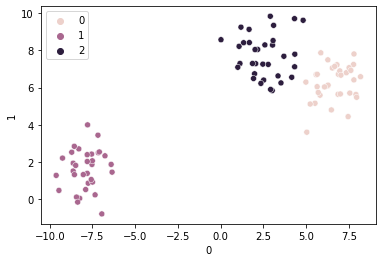

In [9]:
sns.scatterplot(x=df[0], y=df[1], hue=target);

# My KNN implementation

In [10]:
# Euclidean distance
dist = (df - df.iloc[-1]) ** 2
dist

,0,1,2,3
0,23.586507,0.603495,3.146756,19.849961
1,76.702216,38.826131,49.515391,227.370021
2,1.092367,0.038319,0.251530,0.625564
3,23.150511,2.253205,10.441097,16.729141
4,51.580883,0.259219,9.729582,28.558869
...,...,...,...,...
95,25.747764,1.117053,12.756957,26.144878
96,90.031935,27.844979,48.252503,223.896045
97,65.672585,20.720229,54.735410,200.158880
98,1.015569,0.905728,3.340200,2.899655


In [11]:
# Summing up columns for each row
euc_dist = dist.sum(axis=1)
euc_dist

0      47.186719
1     392.413759
2       2.007780
3      52.573954
4      90.128553
         ...    
95     65.766652
96    390.025463
97    341.287104
98      8.161152
99      0.000000
Length: 100, dtype: float64

In [12]:
# Sorting values of closest neighbours
neighbours = target[euc_dist.sort_values().index]
neighbours

99    2
2     2
93    2
56    2
27    2
     ..
87    1
40    1
19    1
23    1
68    1
Length: 100, dtype: int32

In [13]:
# Reseting index
neighbours = neighbours.reset_index(drop=True)
neighbours

0     2
1     2
2     2
3     2
4     2
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int32

In [14]:
# Getting K closest neighbours
K = 5

K_neighbours = neighbours[:K]

In [15]:
# Checking most common iter in Series
from collections import Counter

counter = Counter(K_neighbours)
result = counter.most_common()[0][0]
result

2

# Comparing with KNN from sklearn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(df, target)

KNeighborsClassifier()

In [19]:
knn.predict([df.iloc[-1]])[0]

2